# Ford Bike System Data
## by (David Masila)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco 
Bay area

## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df=pd.read_csv('201902-fordgobike-tripdata (1).csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.shape

(183412, 16)

The data set has 183,412 rows of data collected against 16 variables/columns.


>we need to do some cleaning of our data. I am going to elimate some columns that i deem unnecessary for the data analysis.
besides that i am also going to eliminate NA values

In [7]:
df=df.dropna()

In [8]:
df.shape

(174952, 16)

In [9]:
df=df.drop(['end_station_latitude', 'end_station_longitude','start_station_latitude','start_station_longitude'], axis=1)

In [10]:
df.shape

(174952, 12)

In [11]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

>Our data is clean. No missing values <br>
>To continue the analysis we need to engineer some new features as well as change data types of some of the columns

In [12]:
#conversion of starttime  and endtime columns to datetime datatype
df['start_time']=df['start_time'].astype('datetime64')
df['end_time']=df['end_time'].astype('datetime64')

In [13]:
#i will add an age column and therefore need to convert the "member-birth-year" column to int
df['member_birth_year']=df['member_birth_year'].astype('int')
df['Age']=2022 - df['member_birth_year']

In [14]:
#creating date features i.e day, week, month, hour from the start and end time.
df['start_date']=df['start_time'].dt.date.astype('datetime64')
df['start_hour']=df['start_time'].dt.hour
df['end_date']=df['end_time'].dt.date.astype('datetime64')
df['end_hour']=df['end_time'].dt.hour
df['start_week_day']=df['start_time'].dt.day_name()
#lets convert the duration into hours
df['duration']=df['duration_sec']/60
#drop the duration_sec,start_time and end_time column afterwards
df.drop(['duration_sec','start_time','end_time'],axis=1,inplace=True)

In [15]:
#lets check the new columns
df.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_date,start_hour,end_date,end_hour,start_week_day,duration
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,38,2019-02-28,17,2019-03-01,8,Thursday,869.750000
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,50,2019-02-28,12,2019-03-01,5,Thursday,1030.900000
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,33,2019-02-28,17,2019-03-01,4,Thursday,608.166667
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,48,2019-02-28,23,2019-03-01,0,Thursday,26.416667
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,63,2019-02-28,23,2019-03-01,0,Thursday,29.883333


In [16]:
df['user_type']=df['user_type'].astype('category')
df['member_gender']=df['member_gender'].astype('category')
df['bike_share_for_all_trip']=df['bike_share_for_all_trip'].astype('category')

In [17]:
#lets create bins for age catergory
df.Age.describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: Age, dtype: float64

In [18]:
bins=[20,30,40,50,60,70,150]
labels=['twenties','thirties','forties','fifties','sixties','oldies']
df['Age_group']=pd.cut(df['Age'],bins=bins, labels=labels)

In [19]:
#check numbers for each age_group
df.Age_group.value_counts().sort_values(ascending=True)

oldies       1032
sixties      4749
fifties     14000
forties     30207
twenties    48176
thirties    76788
Name: Age_group, dtype: int64

In [20]:
#make sure the age_group is a category datatype column
df['Age_group']=df['Age_group'].astype('category')

In [21]:
df.shape

(174952, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_id         174952 non-null  float64       
 1   start_station_name       174952 non-null  object        
 2   end_station_id           174952 non-null  float64       
 3   end_station_name         174952 non-null  object        
 4   bike_id                  174952 non-null  int64         
 5   user_type                174952 non-null  category      
 6   member_birth_year        174952 non-null  int32         
 7   member_gender            174952 non-null  category      
 8   bike_share_for_all_trip  174952 non-null  category      
 9   Age                      174952 non-null  int32         
 10  start_date               174952 non-null  datetime64[ns]
 11  start_hour               174952 non-null  int64         
 12  end_date        

### What is the structure of your dataset?

> The dataframe contains 174952 rows of data with 17 features. 
> The columns are 'duration','start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Age','Start_date','Start_hour','end_date','end_hour','start_week_day','Age_group'.

>Most of the features are numeric except for a few which are datetime datatypes and categorical data types.
>Several of the features have been engineered these include Age_group, Start time,hour and data.
>The duration is in hours. 

### What is/are the main feature(s) of interest in your dataset?

> From the dataset i am mostly interested in which age group and Gender rides bicycles the most. What time most riders begin their rides, whether there are more customers compared to subscribers and which of the stations has the highest traffic both ending and starting.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 > duration, start_time, Age_group, member_gender, start_station_name and end_station_name.

## Univariate Exploration

In [23]:
def count_plot(xdata,plot_title, x_label, y_label):
    sns.countplot(data=df, x=xdata, color=sns.color_palette()[1])
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

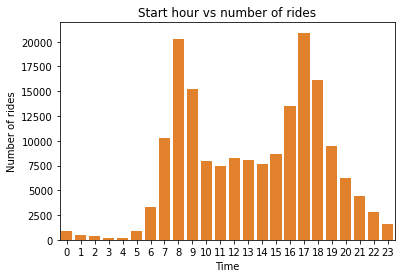

In [24]:
#which hours do rides start
count_plot('start_hour','Start hour vs number of rides','Time','Number of rides')

Alot of rides are taken in the morning at 8 am and and almost an equivalent amount in the afternoon at 5pm. 

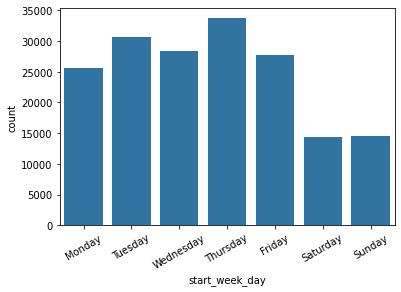

In [25]:
#let us check the days of the week when most of the rides take place
ordered=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x="start_week_day", order=ordered, color=sns.color_palette()[0])
plt.xticks(rotation=30)
plt.show()

Thursday has the highest number of rides compared to any other day of the week. 
Overally, weekdays seem to have the most rides while weekends have the least ride numbers

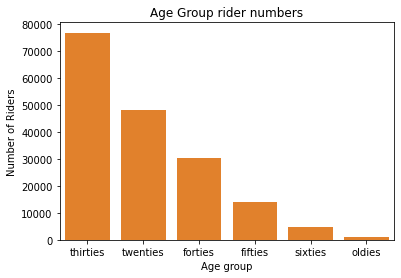

In [24]:
#let us check the number of rides based on their Age categories
count_plot("Age_group","Age Group rider numbers","Age group","Number of Riders")

People in thier thirties have the highest rider numbers compared to the rest. They are closely followed by those in their twenties. Gnerally younger people ride more compared to the old people. There is a decline in the number of riders from forties all the way to the oldies (70 years +)

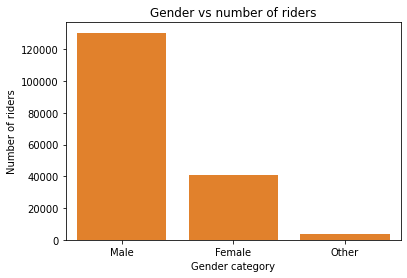

In [25]:
#let us check how gender influnces rider numbers
count_plot("member_gender","Gender vs number of riders","Gender category","Number of riders")

Majority of the riders are male by a very large margin. Females fall second.

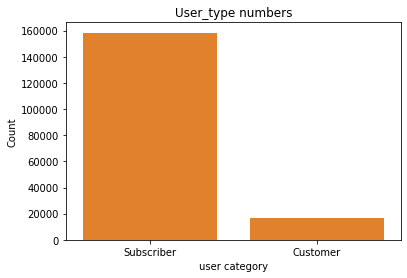

In [26]:
#Let us check the numbers of each user type. How difference the numbers are for customers and subcribers
count_plot("user_type","User_type numbers","user category","Count")

Majority of the riders are Subcribers. Customers make a very small number of the riders

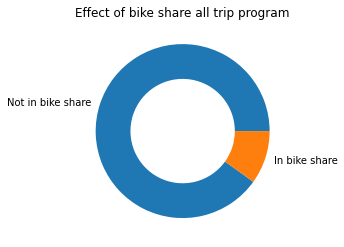

In [27]:
#We need to observe membership in bike share all trip
plt.pie(df.bike_share_for_all_trip.value_counts(),labels=['Not in bike share','In bike share'], wedgeprops={'width':0.4})
plt.title('Effect of bike share all trip program');

Most of the riders are not in the bike share program for all trip

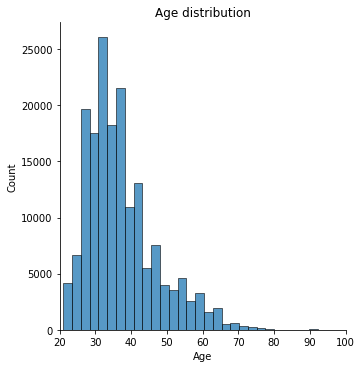

In [28]:
#lets check a distribution of the ages through a histogram
sns.displot(df.Age, bins=50)
plt.xlim(20,100);
plt.title('Age distribution');

The age distribution graph shows a very large number of riders within the ages 25 to 45. This corresponds to the bar graph showing distribution of Age group categories

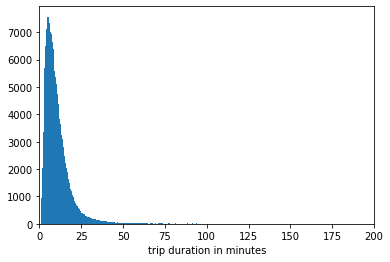

In [29]:
bins=np.arange(0,df.duration.max()+0.5,0.5);
plt.hist(data=df,x='duration',bins=bins);
plt.xlabel('trip duration in minutes')
plt.xlim(0,200);

Majority of the rides take less than 25 minutes. The average duration is about 10 minutes. The distribution is highly left skewed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Alot of rides are taken in the morning at 8 am and and almost an equivalent amount in the afternoon at 5pm.
>Thursday has the highest number of rides compared to any day of the week. Overally, weekdays seem to have the most rides while weekends have the least ride numbers
>Majority of the rides take less than 25 minutes. The average duration is about 10 minutes. The distribution is highly left skewed.

>The age distribution graph shows a very large number of riders within the ages 25 to 45. This corresponds to the bar graph showing distribution of Age group categories
>Majority of the riders are male by a very large margin. Females fall second.

>Most of the riders are not in the bike share program for all trip

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>I did some tidiness converting column types of start and end time to date time also created new columns indicating start,end date only and start,end hour, a column for the start weekday and binning the age of riders for easier categorization and analysis.

>I also dropped column showing latitude and longitude data i deeemed those unecessary for the data analysis

## Bivariate Exploration


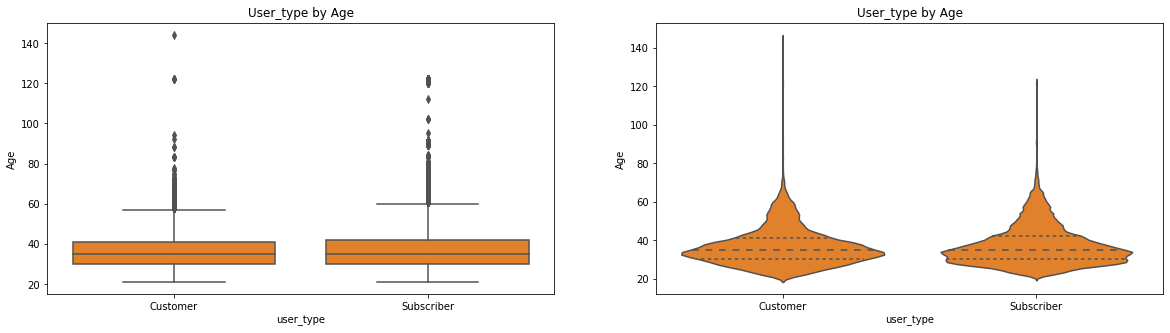

In [30]:
#lets check the relationship between Age and user_type using both violinplots and boxplots
plt.figure(figsize=[20,5])
base_color=sns.color_palette()[1]

plt.subplot(1,2,1)
sns.boxplot(data=df, x="user_type", y="Age", color=base_color)
plt.title('User_type by Age')

plt.subplot(1,2,2)
sns.violinplot(data=df, x="user_type", y="Age", color=base_color, inner='quartile')
plt.title('User_type by Age');

Both subscriber and customer have similar age median, lower quartile and upper quatile. Therefore the differences between user_type categories in terms of age is not much

In [31]:
df.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_date,start_hour,end_date,end_hour,start_week_day,duration,Age_group
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,38,2019-02-28,17,2019-03-01,8,Thursday,869.750000,thirties
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,50,2019-02-28,12,2019-03-01,5,Thursday,1030.900000,forties
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,33,2019-02-28,17,2019-03-01,4,Thursday,608.166667,thirties
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,48,2019-02-28,23,2019-03-01,0,Thursday,26.416667,forties
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,63,2019-02-28,23,2019-03-01,0,Thursday,29.883333,sixties


In [32]:
def bivariate_count(x_data,hue_data,fig_title):
    sns.countplot(data=df, x=x_data, hue=hue_data)
    plt.title(fig_title)

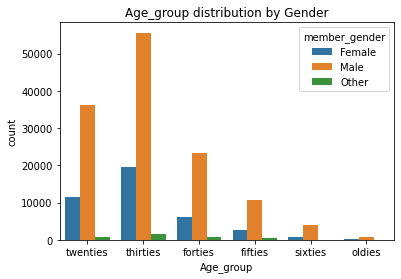

In [33]:
#Let us check the distribution of Age_group by gender
bivariate_count("Age_group","member_gender","Age_group distribution by Gender")

The males dominated the other genders in numbers in each Age_group with their highest numbers in the thirties. 
The guys in their twenties do not ride more than those in thirties despite being younger. 

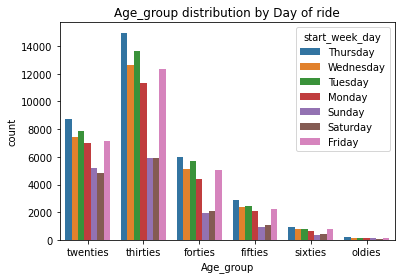

In [34]:
#let us check whether the age_group of individual affects the days they go for rides
bivariate_count("Age_group","start_week_day","Age_group distribution by Day of ride")

Thursday if the day when most of the Age_groups go for rides. Followed by Tuesday, Friday, Wednesday, Monday and the weekends respectively.

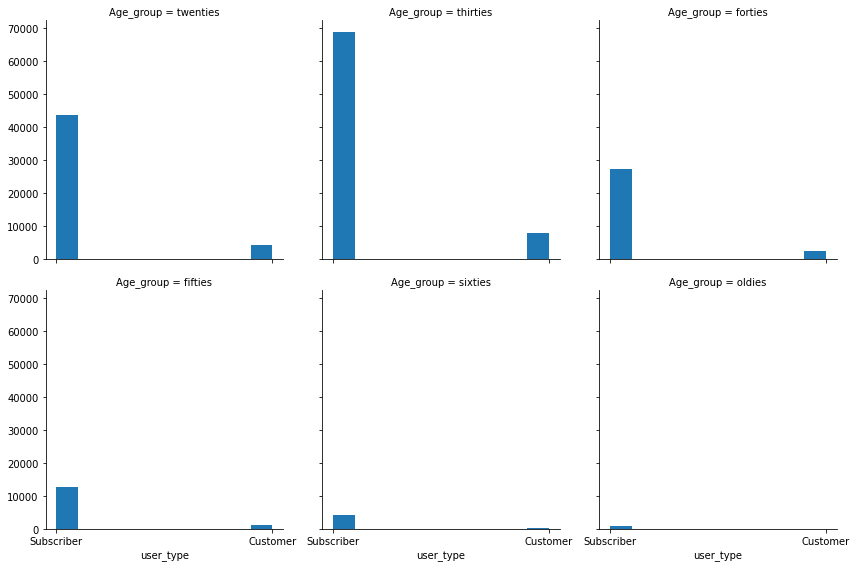

In [35]:
#lets facet the age_group with user_type
g=sns.FacetGrid(data=df, col="Age_group",height=4, col_wrap=3)
g.map(plt.hist,"user_type");

Subscribers are more than Customers throughout the age_groups but most subscribers are in their thirties with the least in the oldies group.

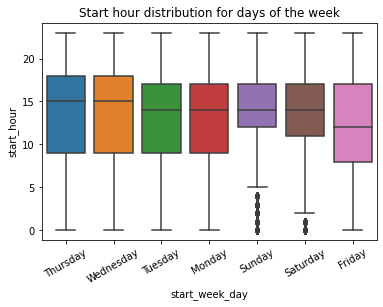

In [43]:
#lets check the distribution of start_hour with days of the week
sns.boxplot(data=df, x="start_week_day", y="start_hour")
plt.title("Start hour distribution for days of the week")
plt.xticks(rotation=30);

In [73]:
day_time=df.groupby(['start_week_day','Age_group'])['start_hour'].mean().round()
day_time_table=day_time.reset_index(name="Average_time")
day_time_table

,start_week_day,Age_group,Average_time
0,Friday,twenties,13.0
1,Friday,thirties,13.0
2,Friday,forties,13.0
3,Friday,fifties,12.0
4,Friday,sixties,12.0
5,Friday,oldies,12.0
6,Monday,twenties,14.0
7,Monday,thirties,13.0
8,Monday,forties,13.0
9,Monday,fifties,13.0


In [63]:
day_time_table=day_time_table.pivot(index="start_week_day", columns="Age_group", values="Average_time")
day_time_table

Age_group,twenties,thirties,forties,fifties,sixties,oldies
start_week_day,,,,,,
Friday,13.0,13.0,13.0,12.0,12.0,12.0
Monday,14.0,13.0,13.0,13.0,13.0,13.0
Saturday,14.0,13.0,14.0,13.0,13.0,14.0
Sunday,15.0,14.0,14.0,14.0,13.0,14.0
Thursday,14.0,14.0,13.0,13.0,13.0,13.0
Tuesday,14.0,13.0,13.0,13.0,13.0,13.0
Wednesday,14.0,14.0,13.0,13.0,13.0,12.0


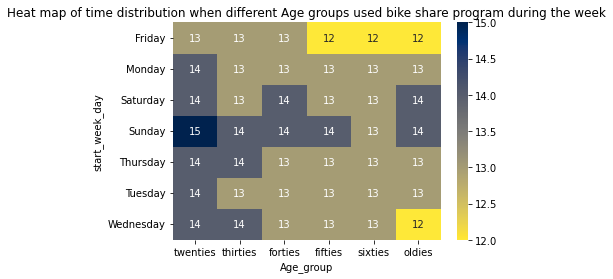

In [71]:
#distribution of average time that age groups go for rides through out the days. Averagely most people go for rides in the afternoon. 
sns.heatmap(data=day_time_table,annot=True, cmap="cividis_r");
plt.title('Heat map of time distribution when different Age groups used bike share program during the week')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers are more than Customers throughout the age_groups but most subscribers are in their thirties with the least in the oldies group.

>Thursday if the day when most of the Age_groups go for rides. Followed by Tuesday, Friday, Wednesday, Monday and the weekends respectively.

>The males dominated the other genders in numbers in each Age_group with their highest numbers in the thirties. The guys in their twenties do not ride more than those in thirties despite being younger.

>Both subscriber and customer have similar age median, lower quartile and upper quatile. Therefore the differences between user_type categories in terms of age is not much

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration


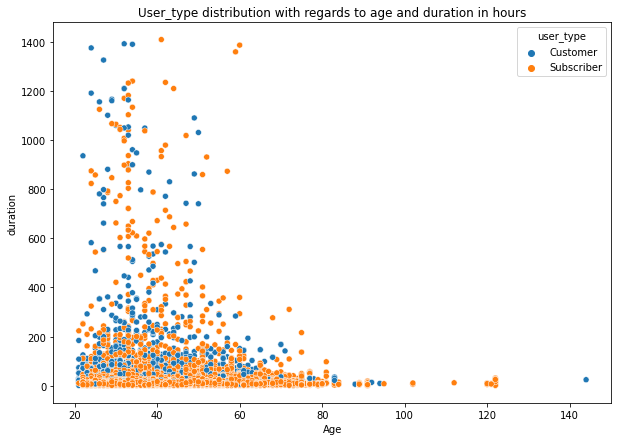

In [36]:
#visualize user_type in terms of age and duration in hours
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x="Age", y="duration", hue="user_type")
plt.title('User_type distribution with regards to age and duration in hours')
plt.show()

Majority Customer user-types ride for longer durations compared to the subscriber type of riders for ages below 60. 

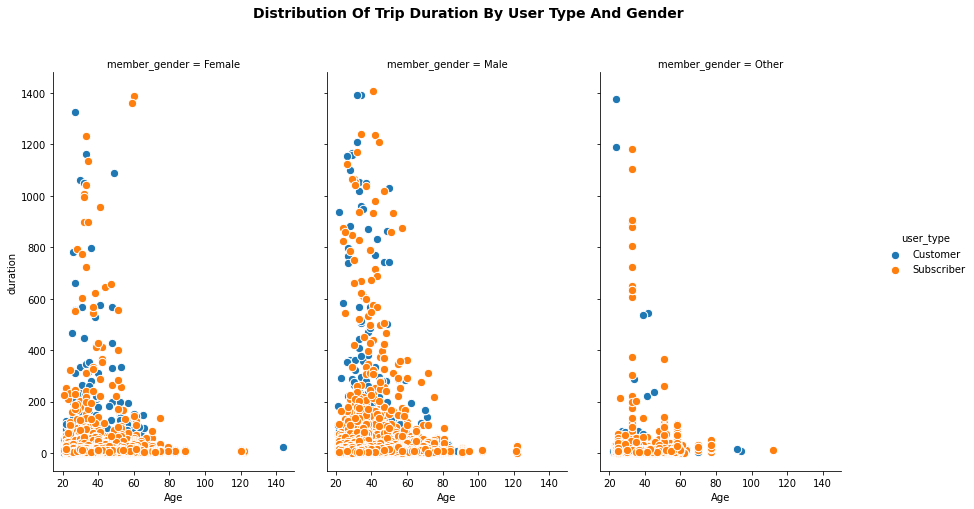

In [37]:
#visualizing the distribution of trip duration by user Type and gender
g = sns.FacetGrid(df, col="member_gender" , hue="user_type" ,height=3, aspect=1)
g = g.map(plt.scatter, "Age" , "duration" , edgecolor="w", s=70)
plt.suptitle("Distribution of trip duration by user Type and gender".title(),y=1,fontsize =14, weight='bold')
g.add_legend()
g.fig.set_size_inches(14,8);

Male customer and subcriber user_type of riders appears to ride a similar amount of time for all age ranges. 
Female subcriber user_type riders ride for a shorter period of time compared to customer type of the same age ranges. 
Other genders are mainly dominated by subcribers who ride for short periods of time compared to other gender types of the same age. 

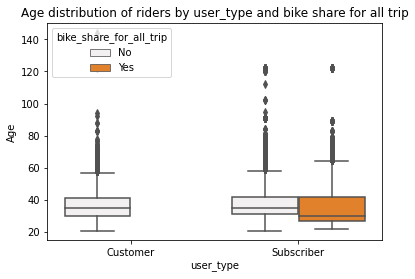

In [38]:
#let us check teh age dictribution by subcriber type and bike_share_for_all_trip status. 
sns.boxplot(data=df, x="user_type", y="Age", hue="bike_share_for_all_trip",color=base_color)
plt.title('Age distribution of riders by user_type and bike share for all trip');

There are no customer  user type who are in the bike share for all trip. Subscribers who are in the bike share for all trip are younger compared to those subcribed but not in the bike share for all trip.

The average age of those subcribed and in the bike share for all trip is lower than the lower quartile (age) for those not in the bike share for all trip

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Majority Customer user-types ride for longer durations compared to the subscriber type of riders for ages below 60. I was expecting the subcribers to have longer rides.

> Male customers and subcriber user_type of riders appears to ride a similar amount of time for all age ranges. Female subcriber user_type riders ride for a shorter period of time compared to customer type of the same age ranges. Other genders are mainly dominated by subcribers who ride for short periods of time compared to other gender types of the same age.

> Subscribers who are in the bike share for all trip are younger compared to those subcribed but not in the bike share for all trip.
The average age of those subcribed and in the bike share for all trip is lower than the lower quartile (age) for those not in the bike share for all trip

>
### Talk about some of the relationships you observed in this part of the investigation. Were there features that 

### Were there any interesting or surprising interactions between features?

> The fact that there were no customder user_type with a bike share for all trip i would have certainly not noticed that without the multivariate visualization and also the age differences for the subcriber type customers in relation to being in the bike share for all trip

## Conclusions
>The data did not need a lot of wrangling efforts. I had to eliminate null values and perform afew feature engineerings such as adding Age column, Age group and converting start and end time columns to datatime as well as extracting hour, day of week and date from the same columns

>In the data I was mainly interested in knowing which day of the week did most rides take place and also time of the day when most rides took place. It turned out that thursday was the day of the week when most rides took place. 
Bike rides peaked at 5pm and 8am.

>I was also interested in knowing gender diffrences in the bike share program. Men are the majority of riders by a very large margin in the program.

>Another area of interest was how Age groups participated in the bike share program. I discovered that people in their thirties participated more than other age groups (grouped by every 10 years) and surprisingly the people in thier twenties rode less than those in thirties.

>My final concern was how the duration of bike ride was influenced by age of user_type. Customer user_types rode for a longer duration of time compared to subcriber user-type ober all age ranges.. 

In [74]:
df.to_csv("clean_fordbike.csv")